# Voting

In [36]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from warnings import filterwarnings
filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bluewin.csv')
df.drop(columns='Unnamed: 0', inplace=True)

In [3]:
df

,KillDiff,FirstBlood,AssistDiff,GoldDiff,Dragon,Herald,ExperienceDiff,TowersDestroyed,MinionDiff,win
0,3,1,3,6.43,0,0,-0.08,0,-2,0
1,0,0,3,-29.08,0,0,-11.73,0,-66,0
2,-4,0,-10,-11.72,1,0,-10.33,0,-17,0
3,-1,0,-5,-13.21,0,1,-0.07,0,-34,0
4,0,0,-1,-10.04,0,0,2.30,0,-15,0
...,...,...,...,...,...,...,...,...,...,...
9221,3,1,-2,25.19,1,0,24.69,0,-18,1
9222,2,0,5,7.82,1,0,8.88,0,27,1
9223,-1,0,-6,-24.16,0,0,-18.77,0,-51,0
9224,-1,1,2,-8.39,1,0,-10.85,0,-23,0


In [4]:
# 설명변수
df.columns[1:-1]

Index(['FirstBlood', 'AssistDiff', 'GoldDiff', 'Dragon', 'Herald',
       'ExperienceDiff', 'TowersDestroyed', 'MinionDiff'],
      dtype='object')

In [5]:
# 종속변수
df.columns[-1]

'win'

In [6]:
# dataset의 row count
# dataset의 column count
df.shape

(9226, 10)

In [7]:
x_data = df.loc[:, 'KillDiff':'MinionDiff'] # 문제데이터
y_data = df.loc[:, 'win'] # 정답데이터

# 데이터를 훈련셋과 테스트셋으로 나누기
X_train, X_test, y_train, y_test = train_test_split(
    x_data, # 문제 데이터
    y_data, # 답 데이터
    test_size =0.2, # 비율
    shuffle = True, # 셔플링 여부
    random_state = 156 # 시드값
)

보팅 분류기의 정확도:  0.7183
LogisticRegression 정확도:  0.7313
KNeighborsClassifier 정확도:  0.6891
DecisionTreeClassifier 정확도:  0.6251


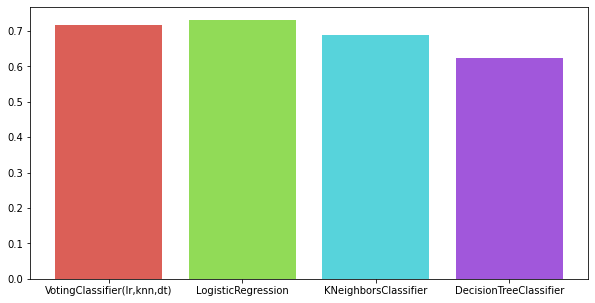

In [38]:
# 보팅 적용을 위한 개별 모델은 로지스틱 회귀와 KNN
logistic_regression = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=8)
dt = DecisionTreeClassifier(random_state=42)

# 시각화용 리스트
models_x = ['VotingClassifier(lr,knn,dt)']
models_y = []

# 개별모델을 소프트보팅 기반의 앙상블 모델로 구현한 분류기
voting_model1 = VotingClassifier(estimators=[('LogisticRegression', logistic_regression), ('KNN', knn), ('DecisionTree', dt)], 
                                voting='hard')

# 보팅 분류기의 학습/예측/평가
voting_model1.fit(X_train, y_train)
pred1 = voting_model1.predict(X_test)
print('보팅 분류기의 정확도: {0: .4f}'.format(accuracy_score(y_test, pred1)))
models_y.append(accuracy_score(y_test, pred1))

# 개별 모델의 학습/예측/평가
classifiers = [logistic_regression, knn, dt]
for classifier in classifiers:
  classifier.fit(X_train, y_train)
  pred1 = classifier.predict(X_test)
  class_name = classifier.__class__.__name__
  models_x.append(class_name)
  models_y.append(accuracy_score(y_test, pred1))
  print('{0} 정확도: {1: .4f}'.format(class_name, accuracy_score(y_test, pred1)))

colors = sns.color_palette('hls', 4)
plt.figure(figsize=(10, 5))
plt.bar(x=models_x, height=models_y, color=colors)
plt.show()

보팅 분류기의 정확도:  0.6652
LogisticRegression 정확도:  0.7313
KNeighborsClassifier 정확도:  0.6891
DecisionTreeClassifier 정확도:  0.6251


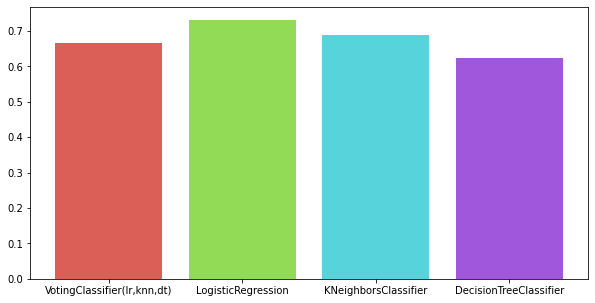

In [39]:
models_x = ['VotingClassifier(lr,knn,dt)']
models_y = []

voting_model2 = VotingClassifier(estimators=[('LogisticRegression', logistic_regression), ('KNN', knn), ('DecisionTree', dt)], 
                                voting='soft')

voting_model2.fit(X_train, y_train)
pred2 = voting_model2.predict(X_test)
print('보팅 분류기의 정확도: {0: .4f}'.format(accuracy_score(y_test, pred2)))
models_y.append(accuracy_score(y_test, pred2))

classifiers = [logistic_regression, knn, dt]
for classifier in classifiers:
  classifier.fit(X_train, y_train)
  pred2 = classifier.predict(X_test)
  class_name = classifier.__class__.__name__
  models_x.append(class_name)
  models_y.append(accuracy_score(y_test, pred2))
  print('{0} 정확도: {1: .4f}'.format(class_name, accuracy_score(y_test, pred2)))

plt.figure(figsize=(10, 5))
plt.bar(x=models_x, height=models_y, color=colors)
plt.show()

# Random Forest

In [14]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

In [15]:
train_input, test_input, train_target, test_target = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

In [16]:
rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)

In [17]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9999322493224932 0.6928184281842819


In [18]:
# 설명 변수 설명력
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.11624956 0.02145702 0.11875225 0.2925246  0.02226083 0.01825255
 0.24400754 0.00538646 0.16110918]


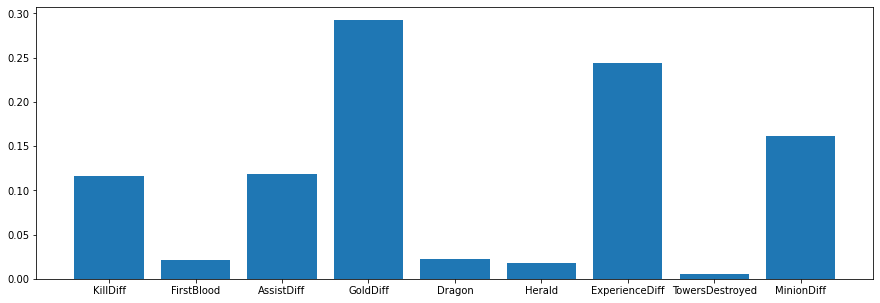

In [41]:
# random forest graph
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.bar(x=df.columns[:-1], height=rf.feature_importances_)
plt.show()

# XGBoost

In [20]:
from xgboost import XGBClassifier

In [21]:
train_input, test_input, train_target, test_target = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

In [22]:
xgb = XGBClassifier(tree_method='hist', random_state=42)
scores = cross_validate(xgb, train_input, train_target, return_train_score=True, n_jobs=-1)

In [23]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.732350948509485 0.7163956639566396


In [24]:
# 설명 변수 설명력
xgb.fit(train_input, train_target)
print(xgb.feature_importances_)

[0.05363347 0.03135268 0.02798614 0.56779236 0.10195725 0.04662129
 0.12439121 0.00966529 0.03660042]


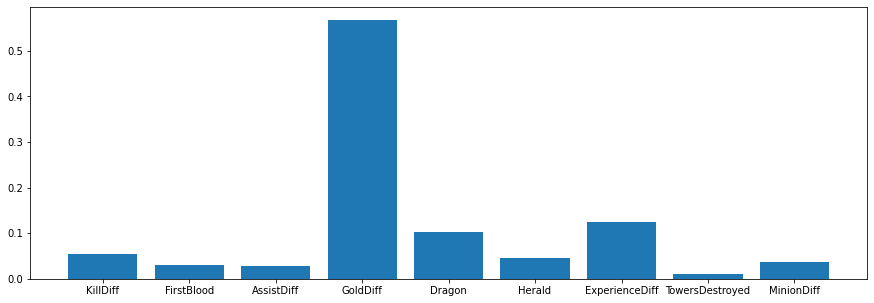

In [25]:
# xgb graph

plt.figure(figsize=(15,5))
plt.bar(x=df.columns[:-1], height=xgb.feature_importances_)
plt.show()